<a href="https://colab.research.google.com/github/paigekan/Machine-Learning/blob/main/Week_8_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [4]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/bank-additional-full.csv", sep = ";")

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)

In [10]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

In [12]:
X

,age,duration,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
41184,46,383,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
41186,44,442,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [13]:
y

,yes
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


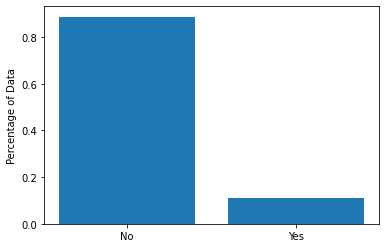

In [14]:
obs = len(y)
plt.bar(["No","Yes"], [len(y[y.yes==0]) / obs, len(y[y.yes==1]) / obs])
plt.ylabel("Percentage of Data")
plt.show()

In [15]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
len(X_scaled)

28831

In [17]:
y_train

,yes
39075,0
34855,0
7107,0
31614,0
34878,0
...,...
6265,0
11284,0
38158,1
860,0


In [18]:
len(X_test)

12357

In [19]:
y_test

,yes
32884,0
3169,0
32206,0
9403,0
14020,0
...,...
15908,0
28222,0
14194,0
19764,0


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

The data is imbalanced so we utilize SMOTE (Synthetic Minority Oversampling Technique) to perform resampling.

Recall, we resample the training data but we do NOT resample the testing data -- we want to simulate the real-world performance of our model so we do not want to be testing on synthetic or fabricated data.

In [20]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_scaled, y_train = oversample.fit_resample(X_scaled, y_train)
len(X_scaled)

51160

In [21]:
y_train

,yes
0,0
1,0
2,0
3,0
4,0
...,...
51155,1
51156,1
51157,1
51158,1


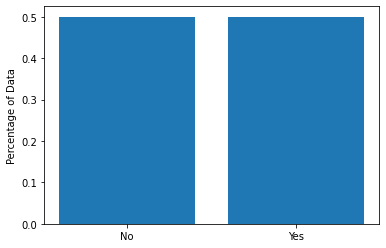

In [22]:
# Classes are now balanced after employing SMOTE
obs = len(y_train)
plt.bar(["No","Yes"], [len(y_train[y_train.yes==0]) / obs, len(y_train[y_train.yes==1]) / obs])
plt.ylabel("Percentage of Data")
plt.show()

In [23]:
# Percentage of 'No'
len(y_train[y_train.yes==0]) / obs

0.5

In [24]:
# Percentage of 'Yes'
len(y_train[y_train.yes==1]) / obs

0.5

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [26]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

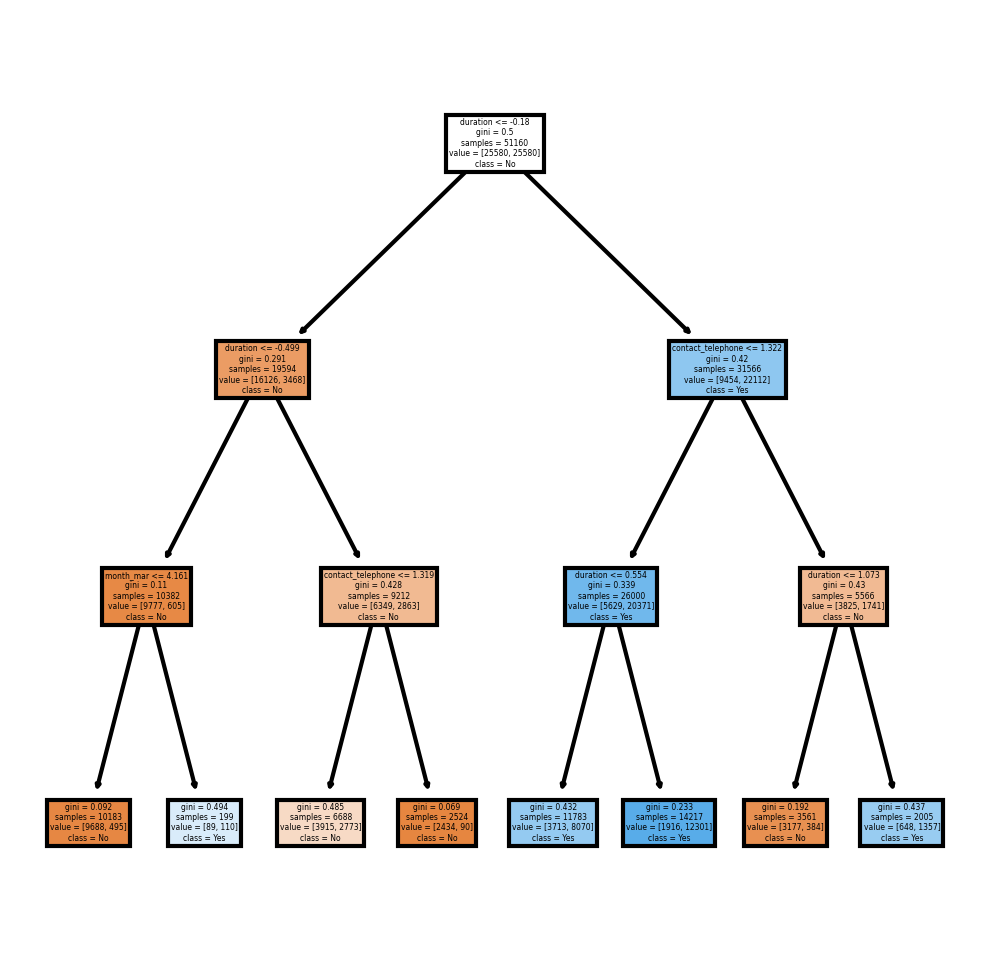

In [27]:
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 1, 
                         figsize = (4,4),
                         dpi = 300)
plot_tree(dtree, 
          filled = True,
          feature_names = X.columns,
          class_names = ["No", "Yes"])

fig.savefig('dec_tree_cm.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [28]:
# Predicted classes
y_pred = dtree.predict(X_test)

# True classes
y_true = y_test

# Compute confusion matrix and store as variable
cm_raw = confusion_matrix(y_true, y_pred)

In [29]:
cm_raw

array([[8223, 2745],
       [ 322, 1067]])

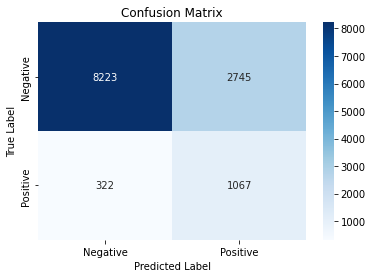

In [30]:
class_labels = ['Negative', 'Positive']

# sns.heatmap plots rectangular data as a color-encoded matrix
sns.heatmap(cm_raw, 
            annot=True, 
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = class_labels,
            yticklabels = class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [31]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator = dtree, 
                            n_estimators = 100, 
                            max_samples = 0.5, 
                            max_features = 1.)


bagging.fit(X_scaled, y_train)

# Predicted classes
y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7525289309703003


In [32]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)
cm_bag

array([[8237, 2731],
       [ 327, 1062]])

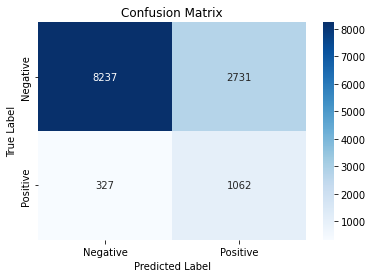

In [33]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
# Define base estimator
dtree = DecisionTreeClassifier(max_depth=3)

adaboost = AdaBoostClassifier(estimator = dtree, 
                              n_estimators = 50, 
                              learning_rate = 0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
# Predicted classes
y_pred = adaboost.predict(X_test)

# True classes
y_true = y_test

# Confusion matrix
cm_boost = confusion_matrix(y_true, y_pred)
cm_boost

array([[10241,   727],
       [  622,   767]])

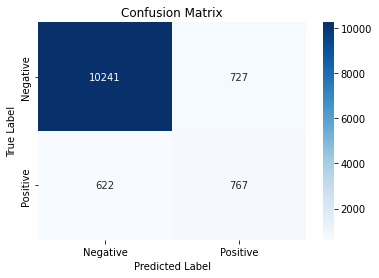

In [37]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=class_labels, 
            yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [38]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 8.7 MB/s eta 0:00:00


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from mlens.ensemble import SuperLearner

# Could choose the same base learner multiple times with different hyperparamters (i.e. KNN = 1 and KNN = 15)

[MLENS] backend: threading


In [40]:
# Set your base estimators (may need to tune the models going in here)
base_estimators = [
    LogisticRegression(penalty = 'l1',
                       solver = 'liblinear'),
    RandomForestClassifier(n_estimators = 100,
                           max_features = 'sqrt'),
    LinearDiscriminantAnalysis(),
    GaussianNB(),
    KNeighborsClassifier(n_neighbors = 5)
]

# Initialize super learner object
super_learner = SuperLearner()

# Add base estimators
super_learner.add(base_estimators)

# Fit to training data
super_learner.fit(X_scaled, y_train)

### Get base_predictions
#base_predictions = super_learner.predict(X_train)
base_predictions = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for e

In [41]:
# These are the individual predictions of the base learners for each observation
base_predictions

array([[1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

In [42]:
# Train your meta learner
meta_learner = LogisticRegression(fit_intercept = False).fit(base_predictions, y_train)

# Predictions
y_pred = meta_learner.predict(super_learner.predict(X_test))
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [43]:
# Interpret coefficients
meta_learner.coef_

array([[-7.23338683,  0.4267529 , -0.76502588,  1.10316511, 14.03304732]])

Based on the coefficients of the logistic regression meta learner, if logistic regression predicts 1 we should predict 0. The predictions output by random forest, linear discriminant analysis, and Gaussian Naive Bayes seem to have a limited effect on the final prediction. Conversely, k-nearest neighbors appears to play the most significant role in determining the final prediction.

In [44]:
# Make, save, and visualzie your confusion matrix

# Confusion matrix
y_pred = meta_learner.predict(super_learner.predict(X_test))
y_true = y_test
cm_super = confusion_matrix(y_true, y_pred)
cm_super

array([[10417,   551],
       [  804,   585]])

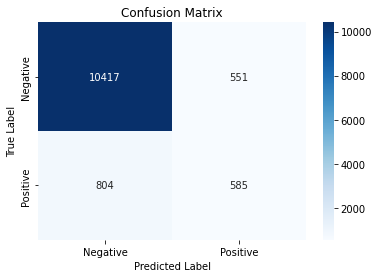

In [45]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_super,
            annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels = class_labels,
            yticklabels = class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and Specificities (Out of Sample)

In [47]:
cm_raw

array([[8223, 2745],
       [ 322, 1067]])

In [48]:
cm_bag

array([[8237, 2731],
       [ 327, 1062]])

In [49]:
cm_boost

array([[10241,   727],
       [  622,   767]])

In [50]:
cm_super

array([[10417,   551],
       [  804,   585]])

In [64]:
# Specificity TN/N (true negative rate)
specificity_dtree = cm_raw[0, 0] / (cm_raw[0,0] + cm_raw[0,1])
print("specificity_dtree:", specificity_dtree)

specificity_bag = cm_bag[0, 0] / (cm_bag[0,0] + cm_bag[0,1])
print("specificity_bag:", specificity_bag)

specificity_boost = cm_boost[0, 0] / (cm_boost[0,0] + cm_boost[0,1])
print("specificity_boost:", specificity_boost)

specificity_super = cm_super[0, 0] / (cm_super[0,0] + cm_super[0,1])
print("specificity_super:", specificity_super)

specificity_dtree: 0.74972647702407
specificity_bag: 0.7510029175784099
specificity_boost: 0.9337162654996353
specificity_super: 0.949762946754194


In [62]:
# Sensitivity TP/P (true positive rate)
sensitivity_dtree = cm_raw[1, 1] / (cm_raw[1,0] + cm_raw[1,1])
print("sensitivity_dtree:", sensitivity_dtree)

sensitivity_bag = cm_bag[1, 1] / (cm_bag[1,0] + cm_bag[1,1])
print("sensitivity_bag:", sensitivity_bag)

sensitivity_boost = cm_boost[1, 1] / (cm_boost[1,0] + cm_boost[1,1])
print("sensitivity_boost:", sensitivity_boost)

sensitivity_super = cm_super[1, 1] / (cm_super[1,0] + cm_super[1,1])
print("sensitivity_super:", sensitivity_super)

sensitivity_dtree: 0.7681785457163427
sensitivity_bag: 0.7645788336933045
sensitivity_boost: 0.5521958243340532
sensitivity_super: 0.42116630669546434


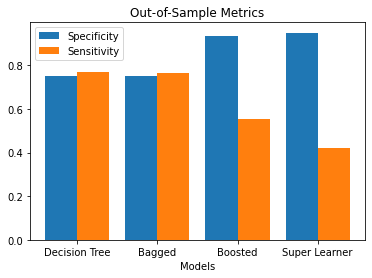

In [76]:
X_models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
Y_specificities = [specificity_dtree, specificity_bag, specificity_boost, specificity_super]
Y_sensitivities = [sensitivity_dtree, sensitivity_bag, sensitivity_boost, sensitivity_super]

X_axis = np.arange(len(X_models))
plt.bar(X_axis - 0.2, Y_specificities, 0.4, label = 'Specificity')
plt.bar(X_axis + 0.2, Y_sensitivities, 0.4, label = 'Sensitivity')

plt.xticks(X_axis, X_models)
plt.xlabel('Models')
plt.title('Out-of-Sample Metrics')
plt.legend()
plt.show()

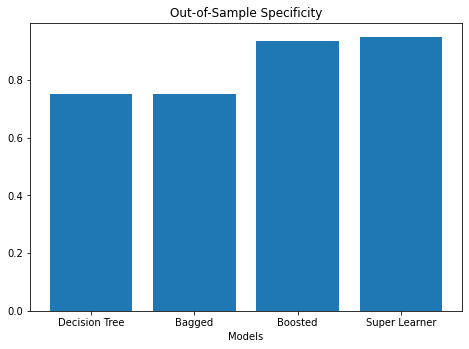

In [80]:
# Individual graph for specificity
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
specificities = [specificity_dtree, specificity_bag, specificity_boost, specificity_super]
ax.bar(models, specificities)
plt.xlabel('Models')
plt.title('Out-of-Sample Specificity')
plt.show()

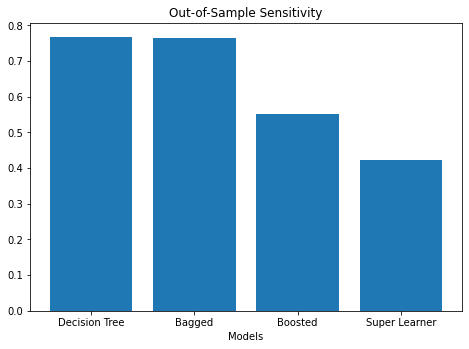

In [81]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Decision Tree', 'Bagged', 'Boosted', 'Super Learner']
sensitivities = [sensitivity_dtree, sensitivity_bag, sensitivity_boost, sensitivity_super]
ax.bar(models, sensitivities)
plt.xlabel('Models')
plt.title('Out-of-Sample Sensitivity')
plt.show()